In [1]:
import numpy as np
from random import *
import matplotlib.pyplot as plt
from time import *
from math import *

## Question 1.e

In [2]:

g = {'1': ['2', '3'],
    '2': ['1', '3', '5'],
    '3' : ['1', '2', '4'],
    '4' : ['3', '5'],
    '5' : ['2', '4']
}

def contraction(g, arete):
    i, j = arete  #les deux sommets de l'arête 
    noeud = i + "," + j #le nouveau sommet
    g[noeud] = [] #la liste des successeur du sommet 
    #O(n)
    for elm in g[i]:
        if elm not in i.split(',') and elm not in j.split(','):
            g[noeud].append(elm)
    #O(n)
    for elm in g[j]:
        if elm not in i.split(',') and elm not in j.split(','):
            g[noeud].append(elm)
    
    del g[i] 
    del g[j]
    return g


## Question 1.f

In [3]:
#Chaque sommet existe dans le dictionnaire exactement le nombre de fois ou elle est relier par une arête 
##On construit une liste qui est la concatination de toutes les liste du dictionaire on note LISTE
####Sa complexiter est O(n) 
## 1 - on tire un sommet aléatoir dans la liste LIST on note S 
#  2 - on tire un autre sommet aléatoir de la liste du sommet S 
def randomSommet(g):
    liste = []
    #O(n)
    for elm in g.keys():
        liste += list(g[elm])
    
    i = randint(0, len(liste)-1)
    s1 = liste[i]
    s2 = -1
    if s1 in g:
        i = randint(0, len(g[s1])-1)
        s2 = g[s1][i]
    else:
        l = list(g.keys())
        #O(n)
        for elm in l:
            e = elm.split(',')
            if s1 in e:
                i = randint(0, len(g[elm]) - 1)
                s1 = elm
                s2 = g[elm][i]
                break
    
    l = list(g.keys())    
    if s2 not in g:
        #O(n)
        for elm in l:
            e = elm.split(',')
            if s2 in e:
                s2 = elm
                break
    return (s1, s2)
    
    

In [4]:
def karger(g):
    while len(g.keys()) > 2:
        arete = randomSommet(g)
        g = contraction(g, arete) 
    return g

In [5]:
karger(g)

{'4,3': ['5', '1', '2'], '5,2,1': ['4', '3', '3']}

## Question 1.g (Complexité théorique) 

###### 1-La fonction de contraction s'éxecute en O(n) ,
###### 2- La fonction qui probabiliste qui tire au hasard une arête s'éxecute en O(n)
###### 3-La complexiter total est O(n²) 


### Question 1.h  (La complexité expérimentale )

Test sur les 3 graphe suivant que on nome graphe1 , graphe2 et graphe3 et qu'on connais la taille de la coupe minimale

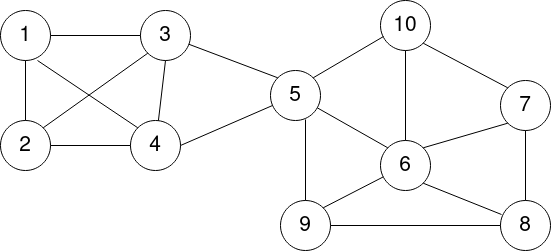

In [6]:
graphe1 = {'1': ['2', '3', '4'],
        '2': ['1', '3', '4'],
        '3': ['1', '2', '4', '5'],
        '4': ['1', '2', '3', '5'],
        '5': ['3', '4', '10', '6', '9'],
        '6': ['5', '10', '9', '7', '8'],
        '7': ['6', '8', '10'],
        '8': ['6', '7', '9'],
        '9': ['5', '6', '8'],
        '10': ['5', '6', '7']
}

karger(graphe1.copy())

{'1': ['2', '3', '4'], '9,5,10,4,7,6,8,2,3': ['1', '1', '1']}

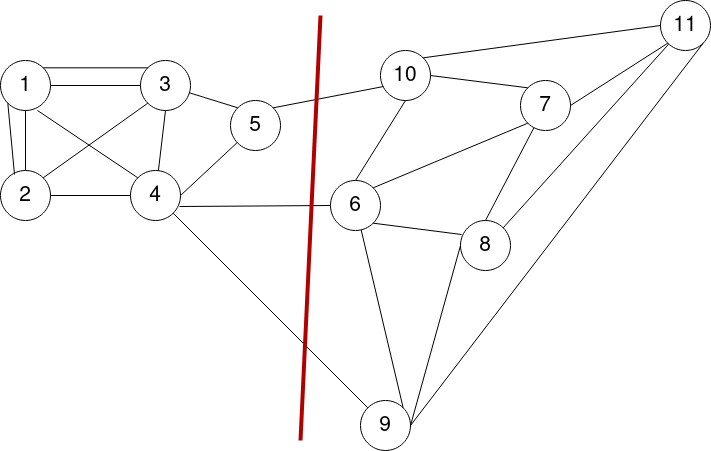

In [7]:
graphe2 = {'1': ['2', '2', '3', '3', '4'],
        '2': ['1', '1', '3', '4'],
        '3': ['1', '1', '2', '4', '5'],
        '4': ['1', '2', '3', '5', '6', '9'],
        '5': ['3', '4', '10'],
        '6': ['4', '10', '9', '7', '8'],
        '7': ['6', '8', '10', '11'],
        '8': ['6', '7', '9', '11'],
        '9': ['4', '6', '8', '11'],
        '10': ['5', '6', '7', '11'],
        '11': ['10', '7', '8', '9']
}

karger(graphe2)

{'7,11,8,10': ['6', '9', '6', '9', '5', '6'],
 '9,5,3,2,1,4,6': ['8', '11', '10', '10', '7', '8']}

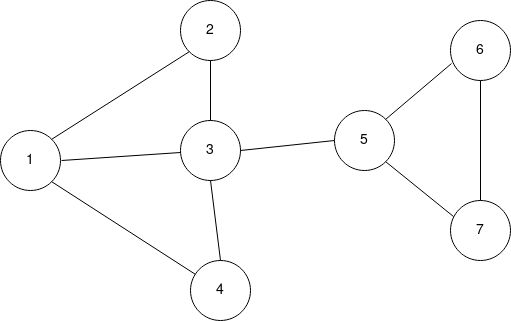

In [8]:
graphe3 = {'1': ['2', '4', '3'],
     '2': ['3', '1'],
     '3': ['1', '2', '4', '5'],
     '4': ['1', '3'],
     '5': ['3', '6', '7'],
     '6': ['5', '7'],
     '7': ['5', '6']
}
#On a pas toujours la meilleurs coupe 
karger(graphe3) 

{'4,1,3,2': ['5'], '5,7,6': ['3']}

Fonction qui crée des graphes de taille n automatiquement

In [9]:
#Graphe avec cycle
def grapheCycle(taille):
    g = dict()
    i = 1 
    while i < taille:
        g[str(i)] = [str(i+1)]
        i += 1
    g[str(taille)] = [str(1)]
    i = taille
    while i > 1:
        g[str(i)].append(str(i-1))
        i -= 1
    g['1'].append(str(taille))
    return g

#grapheComplet
def grapheComplet(taille):
    g = dict()
    #la liste de tous les sommets 
    liste = []
    i = 1
    while i <= taille:
        liste.append(str(i))
        i += 1
    
    i = 1
    while i <= taille:
        liste1 = liste.copy()
        liste1.remove(str(i))
        g[str(i)] = liste1 
        i += 1
    return g

#Graphe bipartie complet
def grapheBipartieComplet(taille): #taille doit être multiple de 2 sinon on prend taille+1 ; E1 = {sommet1, ..., sommetTaille/2}
                            #et E1 = {sommet_Taille/2+1, ..., sommetTaille}
    g = dict()
    
    if(taille %2 != 0):
        taille += 1
    listeSommetE1 = []
    i = 1
    while i <= taille/2:
        listeSommetE1.append(str(i))
        i += 1
    listeSommetE2 = []
    while i <= taille:
        listeSommetE2.append(str(i))
        i += 1
    
    i = 1
    while i <= taille/2:
        g[str(i)] = listeSommetE2
        i += 1
    while i <= taille:
        g[str(i)] = listeSommetE1
        i += 1
    return g
 
#graphe aleatoire 
def grapheAleatoir(taille):
    g = dict()
    i = 1
    while i < taille:
        if str(i) not in list(g.keys()):
            g[str(i)] = []
        j = i + 1
        while j <= taille:
            if randint(0,1) == 1:
                g[str(i)].append(str(j))
                if str(j) not in list(g.keys()):
                    g[str(j)] = []
                g[str(j)].append(str(i))
                    
                
            j += 1
        i += 1
        
    return g



In [72]:
#Teste sur des graphes avec un cycles 
def testGrapheCycle(taille, nbRep, nb): #Elle retourne 2 liste une liste avec les tailles et l'autre les temps correspondant a chaque taille
                                #Pour chaque taille du graphe en execute l'algorithme sur nbRep graphe et en retourne le temps moyenne 
                                #Et on execute de taille a taille + 1
        listeTemps = []
        listeTaille = []
        for i in range(nb):
            moyenne = 0
            for j in range(nbRep):
                g = grapheCycle(taille+j)
                debut = time()
                karger(g)
                tmps = time() - debut
                moyenne += tmps
            listeTemps.append(moyenne/nbRep)
            listeTaille.append(taille+(nbRep/2))
            taille += nbRep
        return listeTaille, listeTemps


def testGrapheComplet(taille, nbRep, nb):
    listeTemps = []
    listeTaille = []
    for i in range(nb):
        moyenne = 0
        for j in range(nbRep):
            g = grapheComplet(taille+j)
            debut = time()
            karger(g)
            tmps = time() - debut
            moyenne += tmps
        listeTemps.append(moyenne/nbRep)
        listeTaille.append(taille+(nbRep/2))
        taille += nbRep
    return listeTaille, listeTemps

def testGrapheBipartie(taille, nbRep, nb):
    listeTemps = []
    listeTaille = []
    for i in range(nb):
        moyenne = 0
        for j in range(nbRep):
            g = grapheBipartieComplet(taille+j)
            debut = time()
            karger(g)
            tmps = time() - debut
            moyenne += tmps
        listeTemps.append(moyenne/nbRep)
        listeTaille.append(taille+(nbRep/2))
        taille += nbRep
    return listeTaille, listeTemps

def testGrapheAleatoire(taille, nbRep, nb):
    listeTemps = []
    listeTaille = []
    for i in range(nb):
        moyenne = 0
        for j in range(nbRep):
            g = grapheAleatoir(taille+j)
            debut = time()
            karger(g)
            tmps = time() - debut
            moyenne += tmps
        listeTemps.append(moyenne/nbRep)
        listeTaille.append(taille+(nbRep/2))
        taille += nbRep
    return listeTaille, listeTemps

### A. Teste sur des graphes qui ont des cycles

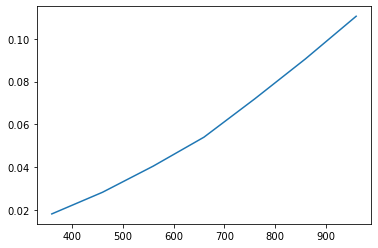

In [81]:
taille, temps = testGrapheCycle(10, 100, 10) #graphe avec cycle, taille de début 10, 

plt.plot(taille[3:],temps[3:])

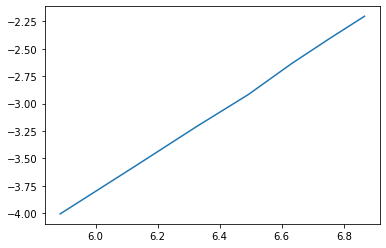

In [116]:
#La complexiter 
tailleLog = np.log(taille[3:])
tempsLog = np.log(temps[3:])

plt.plot(tailleLog, tempsLog)

On voit que c'est une droite donc c'est une complexité polynomiale

In [117]:
##Le coefficient en prend la moyenne des tangentes du graphe
x = 0
for i in range(len(tempsLog) -1):
    x += (tempsLog[i] - tempsLog[i+1]) / (tailleLog[i] - tailleLog[i+1])
    
x /= (len(tempsLog) - 1)
print(x)

1.848356097032321


La complexité de ce cas est O(n²), telque n est le nombre de noeud du graphe 

### B . Teste sur des graphes complet

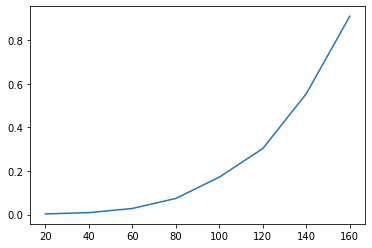

In [124]:
##Graphe complet
taille1, temps1 = testGrapheComplet(10, 20, 8)
plt.plot(taille1, temps1)

3.1801637699832868


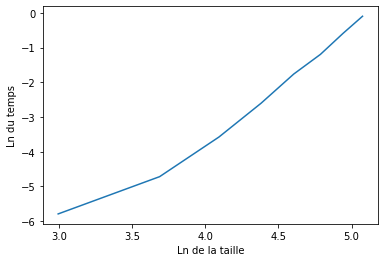

In [125]:
##On vois affiche 
taille1Log = np.log(taille1)
temps1Log = np.log(temps1)

plt.ylabel("Ln du temps")
plt.xlabel("Ln de la taille")
plt.plot(taille1Log, temps1Log)

#Même chose que sur le graphe cycle 
x = 0
for i in range(len(temps1Log) -1):
    x += (temps1Log[i] - temps1Log[i+1]) / (taille1Log[i] - taille1Log[i+1])
    
x /= (len(temps1Log) - 1)
print(x)

La complexité dans ce cas est O(n³), telque n est le nombre de noeud du graphe

### C . Teste sur des graphes bipartis complets

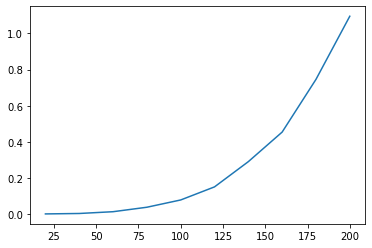

In [126]:
taille2, temps2 = testGrapheBipartie(10, 20, 10)
plt.plot(taille2, temps2)

3.304837592413805


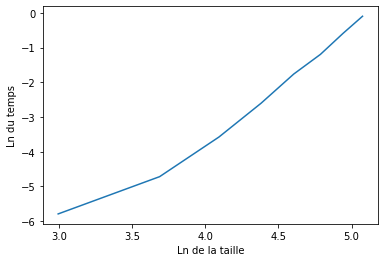

In [127]:
taille2Log = np.log(taille2)
temps2Log = np.log(temps2)

plt.ylabel("Ln du temps")
plt.xlabel("Ln de la taille")
plt.plot(taille1Log, temps1Log)
#Même chose que sur le graphe cycle 
x = 0
for i in range(len(temps2Log) -1):
    x += (temps2Log[i] - temps2Log[i+1]) / (taille2Log[i] - taille2Log[i+1])
    
x /= (len(temps2Log) - 1)
print(x)

La complexité dans ce cas est O(n³), telque n est le nombre de noeud du graphe

### D . Teste sur des graphes aleatoir

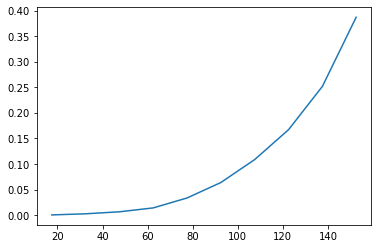

In [128]:
taille3, temps3 = testGrapheAleatoire(10, 15, 10)
plt.plot(taille3, temps3)

3.3375383591145695


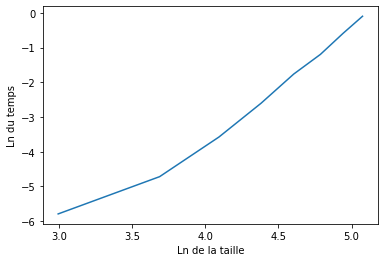

In [129]:
taille3Log = np.log(taille3)
temps3Log = np.log(temps3)

plt.ylabel("Ln du temps")
plt.xlabel("Ln de la taille")
plt.plot(taille1Log, temps1Log)
#Même chose que sur le graphe cycle 
x = 0
for i in range(len(temps2Log) -1):
    x += (temps3Log[i] - temps3Log[i+1]) / (taille3Log[i] - taille3Log[i+1])
    
x /= (len(temps2Log) - 1)
print(x)

La complexité dans ce cas est O(n³), telque n est le nombre de noeud du graphe

### D'après les testes A, B, C, D la complexité experimentale est O(n³) 

# Exercice 2

## Question 2.a 
une étude expérimentale de la probabilité de succès des 3 graphe (graphe1, graphe2 et graphe3)

Pour chaque graphe on fait 100 testes et on vérifie la probalité de succées 

In [89]:
def testProba(graphe, nbTest, tailleCoupe): #Elle prend en pramètre le graphe, le nb de teste a faire et
                                              #et la taille de la coupe minimal
    taille = tailleCoupe
    nbSucces = 0
    for i in range(nbTest):
        g1 = graphe.copy()
        g = karger(g1) # Les deux coupe du format {'som1, som2, ...': [suc1, suc2], 'som1, som2, ...': [suc1, suc2]}
        s = list(g.keys())[0] #une des deux coupe
        t = len(g[s]) #la taille de la coupe
        if t == taille:
            nbSucces += 1
    return nbSucces
###Un graphe avec cycle on est doit avoir la taille de la coupe 2 
nbSucces = testProba(grapheCycle(5), 100, 2)
print("nbSucces dans un graphe avec cycle :", nbSucces , "/", 100) 

   

nbSucces dans un graphe avec cycle : 100 / 100
nbSucces dans un graphe complet : 85 / 100


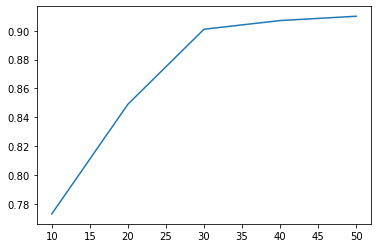

In [109]:
##La probalité de succees sur des graphes complets de taille 10 .... a 100
###On teste 1000 fois pour chaque graphe 
listeTaille = []
listeProba = [] 
deb = 10
while deb <= 50:
    listeTaille.append(deb)
    nbSucces = testProba(grapheComplet(deb), 1000, deb-1)
    listeProba.append(nbSucces/1000)
    deb += 10

plt.plot(listeTaille, listeProba)

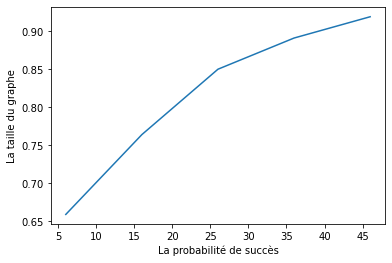

In [108]:
##La probalité de succees sur des graphes bipartie complets de taille 10 .... a 50
###On teste 1000 fois pour chaque graphe 
listeTaille = []
listeProba = [] 
deb = 6
nbSucces = testProba(grapheBipartieComplet(6), 1000, 3)

while deb <= 50:
    listeTaille.append(deb)
    nbSucces = testProba(grapheBipartieComplet(deb), 1000, deb/2)
    listeProba.append(nbSucces/1000)
    deb += 10 

plt.figure()
plt.xlabel("La probabilité de succès")
plt.ylabel("La taille du graphe")
plt.plot(listeTaille, listeProba)
plt.show()

In [ ]:
##La probalité de succees sur des graphes biparties complets de taille 10, 20, 30, 40, 50
###On teste 1000 fois pour chaque graphe 


## Les deux graphes précédent élustre bien le fait que la probabilité de succés augmente quand la taille du graphe augmente

## Question 2.b

In [114]:
def kargerIter(g, t):
    m = -1
    gFinal = dict()
    while t > 0:
        g1 = g.copy()
        while len(g1.keys()) > 2:
            arete =randomSommet(g1)
            g1 = contraction(g1, arete)
        sIter = list(g1.keys())[0]
        if(m == -1 or len(sIter) < m):
            m = len(sIter)
            gFinal = g1.copy()
        
        t -= 1
    return gFinal
        


In [115]:
kargerIter(grapheCycle(6), 5)

{'2': ['3', '1'], '3,4,1,6,5': ['2', '2']}

## Question 2.c (Etude expérimentale)

In [118]:
def testGrapheComplet2(taille, nbRep, nb):
    listeTemps = []
    listeTaille = []
    for i in range(nb):
        moyenne = 0
        for j in range(nbRep):
            g = grapheComplet(taille+j)
            debut = time()
            kargerIter(g, 5)
            tmps = time() - debut
            moyenne += tmps
        listeTemps.append(moyenne/nbRep)
        listeTaille.append(taille+(nbRep/2))
        taille += nbRep
    return listeTaille, listeTemps


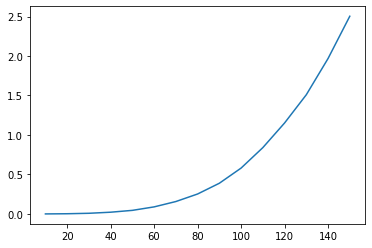

In [119]:
##Graphe complet on voie que le temps est expontiel 
taille1, temps1 = testGrapheComplet2(5, 10, 15)
plt.plot(taille1, temps1)

2.851898048752936


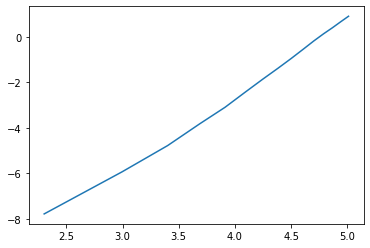

In [126]:
tailleLog = np.log(taille1)
tempsLog = np.log(temps1)
x = (tempsLog[2] - tempsLog[1]) / (tailleLog[2] - tailleLog[1]) 
print(x)
plt.plot(np.log(taille1), np.log(temps1))


# Exercice 3

## Qestion A 

#### On a l'algorithme de contraction partielle fait la boucle  1 + n / √2 
#### L'algorithme de Karger-Stein :  
#### 1 - Appel de l'algorithme Karger-Stein récursivement 2 fois, a chaque fois avec un graphe de 1+ n / √2 sommet et qui s'éxecute en T( 1 + n / √2 )  
#### 2 - Appel la fonction de contraction partielle.
#### 3 - La fonction de contraction partielle est appelé 1 + n / √2 fois  alors on a 
#### (1 + n / √2) * ( 1 + n / √2) => O(n²) 

#### D'après 1 et 3 on a bien  T(n) = 2 T(1 + n / √2)  + O(n²) 


#### Déduire :
#### On a l'algorithme de karger-Stein s'éxecute récursivement donc le temps d'éxecution de T(n) = O(n²*log(n))




























## Question D

In [19]:
s = 4
j = 1
sommet = []
while s > 0:
    if s % 2 == 1:
        sommet.append(j)
    s = int(s/2)
    j += 1

print(sommet)

[3]


In [20]:
def contractionPartielle(g ,t):
    g1 = g.copy()
    while(len(g1.keys()) > t):
        arete = randomSommet(g1)
        contraction(g1, arete)
        
    return g1

def calculCoup(g):
    m = -1 #la taille de la coupe minimale trouver jusqu'a maintenant 
    listKeys = list(g.keys()) #Les sommets du graphe g 
    n = len(listKeys) #Le nombre de sommet du graphe g
    nb = pow(2, n) - 2 #Le nombre de combinaison a essaie
    i = 1
    sBest = dict() #La coupe minimale
    while i < nb:
        s = i
        sommet = []
        j = 0
        ##calculer les sommets attester comme coupe
        while s > 0: 
            if s%2 == 1:
                sommet.append(j)
            s  = int(s/2)
            j += 1
        if (len(sommet) == 1): #Couper que le sommet
            som = sommet[0] #récupèrer le numéro du sommet
            som =  listKeys[som] #récupèrer la clé du sommet 
            if m == -1 or m > len(g[som]) :
                m = len(g[som])
                sBest = som
        else: #compter le nombre d'arête sortante 
            #recupèrer la coupe actuel
            sActuel = []
            for s in sommet:
                som = listKeys[s]
                for elm in som.split(','):
                    sActuel.append(elm)
            #compter le nombre d'arête de la coupe actuelle 
            coupe1 = 0
            for s in sommet:
                som = listKeys[s]
                arete = g[som] #Les successeurs du sommet 
                for elm in arete:
                    if elm not in sActuel:
                        coupe1 += 1
            if m == -1 or m > coupe1:
                m = coupe1 
                sBest = ','.join(sActuel) #La coupe minimale
        
        i += 1
    return sBest.split(",")
                
    
def kargerStein(g):
    m = -1 
    if len(list(g.keys())) <= 6:
        return calculCoup(g)
    else:
        t = int( 1 + len( list(g.keys())) / sqrt(2))
        g1 = contractionPartielle(g, t)
        s1 = kargerStein(g1)
        m1 = len(s1)
        g2 = contractionPartielle(g, t)
        s2 = kargerStein(g2)
        m2 = len(s2)
        if m1 < m2:
            return s1
        else:
            return s2
        

In [23]:
#Test 1 sur le graphe 

In [22]:
#Teste 1 sur un graph 
g = {'1': ['2', '4', '3'],
     '2': ['3', '1'],
     '3': ['1', '2', '4', '5'],
     '4': ['1', '3'],
     '5': ['3', '6', '7'],
     '6': ['5', '7'],
     '7': ['5', '6']
    }
kargerStein(g)

['4']

In [95]:
sorted(kargerStein(graphe1.copy()))

['1', '2', '3', '4']